In [ ]:
#%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

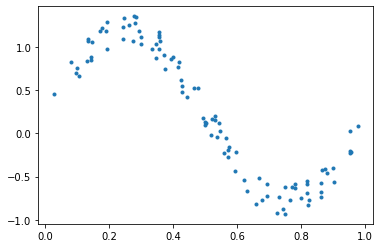

In [ ]:
N = 100
X = np.random.rand(N, 1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(N, 1)
plt.plot(X, Y, '.')
plt.show()

In [ ]:
W = np.random.rand()
b = np.random.rand()

W = tf.Variable(W)
b = tf.Variable(b)
lr = 0.1

for epoch in range(1000):
  with tf.GradientTape() as t:
    y = W * X + b
    loss = tf.reduce_mean((y - Y)**2)
  dW, db = t.gradient(loss, [W, b]) # de/dW, de/db
  W.assign_sub(lr * dW) # W -= lr * dW
  b.assign_sub(lr * db) # b -= lr * db
  print(epoch, W.numpy(), b.numpy(), loss.numpy())

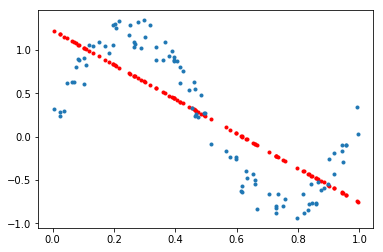

In [ ]:
Z = W * X + b
plt.plot(X, Z, '.r')
plt.plot(X, Y, '.')
plt.show()

In [ ]:
#  1--W1--100--W2--100--W3--1
W1 = tf.Variable(np.random.randn(1, 100))
b1 = tf.Variable(np.random.randn(100))
W2 = tf.Variable(np.random.randn(100, 100))
b2 = tf.Variable(np.random.randn(100))
W3 = tf.Variable(np.random.randn(100, 1))
b3 = tf.Variable(np.random.randn(1))

def relu(x):
  return tf.where(x>=0, x, 0)

lr = 0.0001
for epoch in range(7000):
  with tf.GradientTape() as t:
    y = relu(X @ W1 + b1)
    y = relu(y @ W2 + b2)
    y = y @ W3 + b3
    loss = tf.reduce_mean((y - Y)**2)
  dW1, db1, dW2, db2, dW3, db3 = t.gradient(loss, [W1, b1, W2, b2, W3, b3])
  W1.assign_sub(lr * dW1)
  b1.assign_sub(lr * db1)
  W2.assign_sub(lr * dW2)
  b2.assign_sub(lr * db2)
  W3.assign_sub(lr * dW3)
  b3.assign_sub(lr * db3)
  if epoch % 1000 == 0:
    print(loss.numpy())

7845.94693547782
0.06498967055961537
0.03717282383001333
0.02768017366146913
0.0244097798728877
0.022640587692735803
0.021634131438579677


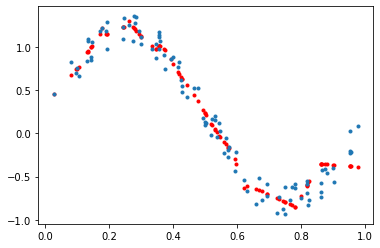

In [ ]:
Z = relu(X @ W1 + b1)
Z = relu(Z @ W2 + b2)
Z = Z @ W3 + b3
plt.plot(X, Z, '.r')
plt.plot(X, Y, '.')
plt.savefig('re.png')
plt.show()